based on th works of : https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

print(tf.__version__)

2.7.0


## Import data

source data: https://www.kaggle.com/elikplim/car-evaluation-data-set

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

In [2]:
column_names = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']

In [3]:
df_cars = pd.read_csv('/tf/notebooks/data/car_evaluation.csv', names=column_names, header=None)

In [4]:
df_cars.head(5)

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df_cars.shape

(1728, 7)

In [6]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

In [7]:
df_cars.output.value_counts().plot(kind='pie', autopct='%0.01f%%', explode=(0.05, 0.05, 0.05,0.05))

<AxesSubplot:ylabel='output'>

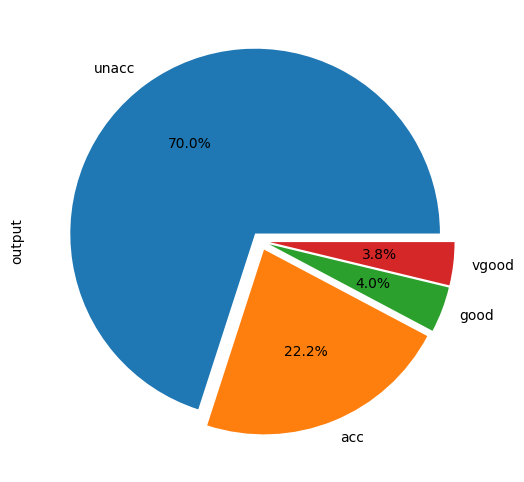

In [8]:
plt.show()

## Data tranformation

In [9]:
def df_transform(df):
    
    price = pd.get_dummies(df.price, prefix='price')
    maint = pd.get_dummies(df.maint, prefix='maint')
    doors = pd.get_dummies(df.doors, prefix='doors')
    persons = pd.get_dummies(df.persons, prefix='persons')
    lug_capacity = pd.get_dummies(df.lug_capacity, prefix='lug_capacity')
    safety = pd.get_dummies(df.safety, prefix='safety')
    
    labels = pd.get_dummies(df.output, prefix='condition')
    
    features = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)
    
    return (features, labels)

In [10]:
df_features, df_labels = df_transform(df_cars)

In [11]:
df_features.head(5)

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_capacity_big,lug_capacity_med,lug_capacity_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [12]:
df_labels.head(5)

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


Let's now convert our labels into a numpy array:

In [13]:
labels = df_labels.values

## Train test split

Now, let's split the dataset into a training set and a test set. We will use the test set in the final evaluation of our model.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_features, labels, test_size=0.20, random_state=42)

## Model training

In [27]:
def dnn_model(X, y):
    
    input_layer = Input(shape=(X.shape[1],))
    dense_layer_1 = Dense(15, activation='relu')(input_layer)
    dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
    output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()]) 
    
    return (model)

In [28]:
model = dnn_model(df_features, labels)

In [29]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_6 (Dense)             (None, 15)                330       
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
 dense_8 (Dense)             (None, 4)                 44        
                                                                 
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
tf.keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [31]:
train_history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 1s 4ms/step - loss: 0.9500 - recall: 0.4860 - val_loss: 0.8729 - val_recall: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 3ms/step - loss: 0.6635 - recall: 0.7195 - val_loss: 0.6947 - val_recall: 0.6498
Epoch 3/50
139/139 [==============================] - 0s 3ms/step - loss: 0.5146 - recall: 0.7158 - val_loss: 0.5633 - val_recall: 0.6895
Epoch 4/50
139/139 [==============================] - 0s 3ms/step - loss: 0.4136 - recall: 0.7692 - val_loss: 0.4745 - val_recall: 0.7762
Epoch 5/50
139/139 [==============================] - 0s 3ms/step - loss: 0.3495 - recall: 0.8244 - val_loss: 0.4180 - val_recall: 0.7978
Epoch 6/50
139/139 [==============================] - 0s 3ms/step - loss: 0.3040 - recall: 0.8697 - val_loss: 0.3671 - val_recall: 0.8231
Epoch 7/50
139/139 [==============================] - 0s 3ms/step - loss: 0.2635 - recall: 0.8760 - val_loss: 0.3281 - val_recall: 0.8375
Epoch 8/50
139/139 [==============

In [33]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 2ms/step - loss: 0.0968 - recall: 0.9538
Test Score: 0.09678592532873154
Test Accuracy: 0.9537572264671326
